In [1]:
import numpy as np 
import pandas as pd 
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.simplefilter(action='ignore', category=Warning)

/kaggle/input/data-storm-6-0/sample_submission_storming_round.csv
/kaggle/input/data-storm-6-0/train_storming_round.csv
/kaggle/input/data-storm-6-0/test_storming_round.csv


In [2]:
train = pd.read_csv("/kaggle/input/data-storm-6-0/train_storming_round.csv")
test = pd.read_csv("/kaggle/input/data-storm-6-0/test_storming_round.csv")

In [3]:
train.describe()

,row_id,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000
mean,7654.500000,40.585772,1.491246,2.991116,10.045728,17.516527,1.989679,2.996538,4.469624,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886
std,4419.183296,11.688204,1.119554,2.001613,6.037296,6.616954,1.420996,2.004386,2.875329,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000
25%,3827.750000,31.000000,0.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000
50%,7654.500000,41.000000,1.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000
75%,11481.250000,51.000000,2.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000
max,15308.000000,60.000000,3.000000,6.000000,20.000000,34.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,378.000000


In [4]:
train.describe(include=['object'])

,agent_code,agent_join_month,first_policy_sold_month,year_month
count,15308,15308,15308,15308
unique,905,64,28,20
top,455ca878,5/1/2019,4/1/2024,8/1/2024
freq,20,520,1305,905


In [5]:
test.describe()

,row_id,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02,914.000000,914.000000,914.000000
mean,457.500000,40.506565,1.540481,2.903720,9.798687,17.318381,2.096280,2.994530,4.450766,13.928884,3.088621,5.025164,7.405908,15.519694,20.114880,1.008371e+06,226420.912473,30.931072,102.386214
std,263.993371,11.698497,1.120848,1.974517,5.999722,6.695894,1.383492,1.995332,2.911676,4.592290,1.595387,2.402632,3.537997,4.767559,9.636944,8.221544e+05,175909.860712,25.300530,76.215860
min,1.000000,20.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,2396.000000,0.000000,0.000000
25%,229.250000,31.000000,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,14.250000,3.419635e+05,92338.750000,11.000000,39.000000
50%,457.500000,41.000000,2.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,7.000000,15.000000,21.000000,8.349145e+05,185448.000000,27.000000,88.000000
75%,685.750000,51.000000,3.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.574566e+06,313027.750000,48.000000,153.750000
max,914.000000,60.000000,3.000000,6.000000,20.000000,33.000000,4.000000,6.000000,9.000000,30.000000,6.000000,10.000000,15.000000,30.000000,42.000000,3.587922e+06,818544.000000,120.000000,333.000000


In [6]:
test.describe(include=['object'])

,agent_code,agent_join_month,first_policy_sold_month,year_month
count,914,914,914,914
unique,914,65,28,1
top,de9a845f,5/1/2019,4/1/2024,9/1/2024
freq,1,26,161,914


# Preprocess the Data

In [7]:
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'

# Combine
df = pd.concat([train, test], ignore_index=True)

In [8]:
import pandas as pd

# Group by agent
agent_grouped = df.groupby('agent_code').agg({
    'ANBP_value': 'sum',
    'new_policy_count': ['mean', 'std']
})

# Flatten column names
agent_grouped.columns = ['ANBP_total', 'policy_mean', 'policy_std']
agent_grouped = agent_grouped.reset_index()

In [9]:
df

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,dataset_type
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,3,4,8,15,0,0,93313,30,162,train
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,4,3,10,17,25,1071450,164804,0,175,train
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,3,7,11,21,26,1601210,426690,84,78,train
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,2,2,9,13,18,283230,47793,39,144,train
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,3,10,6,19,20,1957680,562239,19,40,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,910,8f77f8e4,55,5/1/2020,1/1/2022,9/1/2024,2,1,11,16,...,4,3,7,14,21,1143954,313127,14,21,test
16218,911,a199082b,60,10/1/2021,11/1/2022,9/1/2024,2,1,15,21,...,2,4,2,8,26,2169310,267832,8,78,test
16219,912,9c2e3be7,45,7/1/2022,7/1/2023,9/1/2024,3,5,14,27,...,3,2,10,15,34,1980194,449309,60,238,test
16220,913,89cb3dd5,23,5/1/2021,6/1/2023,9/1/2024,3,5,7,19,...,3,7,3,13,28,2489004,462418,13,56,test


In [10]:
agent_grouped

,agent_code,ANBP_total,policy_mean,policy_std
0,003c1999,27562219,22.619048,9.795286
1,00d5bda3,18982208,19.952381,13.063216
2,012a3553,21477773,18.523810,10.533846
3,012f0e15,18339446,19.476190,9.877343
4,0177ed5f,21444727,21.047619,7.255868
...,...,...,...,...
909,ff8edcc9,24823097,21.428571,10.057691
910,ff955d18,3465210,13.333333,13.012814
911,ffca3177,26541963,21.095238,7.374990
912,ffe6c9e9,17084083,19.380952,9.124013


# Performance Score

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def calculate_performance_score(df, anbp_weight=0.6, consistency_weight=0.4):
    # Group by agent and compute metrics
    agent_grouped = df.groupby('agent_code').agg({
        'ANBP_value': 'sum',
        'new_policy_count': ['mean', 'std']
    })

    # Flatten column names
    agent_grouped.columns = ['ANBP_total', 'policy_mean', 'policy_std']
    agent_grouped = agent_grouped.reset_index()

    # Compute Coefficient of Variation (CV) and consistency score
    agent_grouped['policy_cv'] = agent_grouped['policy_std'] / agent_grouped['policy_mean']
    agent_grouped['policy_cv'].replace([float('inf'), -float('inf')], 1, inplace=True)
    agent_grouped['policy_cv'] = agent_grouped['policy_cv'].fillna(1)
    agent_grouped['consistency_score'] = 1 - agent_grouped['policy_cv']
    agent_grouped['consistency_score'] = agent_grouped['consistency_score'].clip(lower=0)

    # Normalize ANBP and consistency scores
    scaler = MinMaxScaler()
    agent_grouped[['ANBP_scaled', 'consistency_scaled']] = scaler.fit_transform(
        agent_grouped[['ANBP_total', 'consistency_score']]
    )

    # Final performance score
    agent_grouped['performance_score'] = (
        anbp_weight * agent_grouped['ANBP_scaled'] +
        consistency_weight * agent_grouped['consistency_scaled']
    )

    return agent_grouped[['agent_code', 'ANBP_total', 'policy_mean', 'policy_std', 
                          'consistency_score', 'performance_score']]

In [12]:
performance_df = calculate_performance_score(df, anbp_weight=0.6, consistency_weight=0.4)

In [13]:
performance_df

,agent_code,ANBP_total,policy_mean,policy_std,consistency_score,performance_score
0,003c1999,27562219,22.619048,9.795286,0.566945,0.686281
1,00d5bda3,18982208,19.952381,13.063216,0.345280,0.453591
2,012a3553,21477773,18.523810,10.533846,0.431335,0.530140
3,012f0e15,18339446,19.476190,9.877343,0.492850,0.503630
4,0177ed5f,21444727,21.047619,7.255868,0.655264,0.621622
...,...,...,...,...,...,...
909,ff8edcc9,24823097,21.428571,10.057691,0.530641,0.626158
910,ff955d18,3465210,13.333333,13.012814,0.024039,0.065499
911,ffca3177,26541963,21.095238,7.374990,0.650396,0.703739
912,ffe6c9e9,17084083,19.380952,9.124013,0.529228,0.497863


# Analyze Performance of the Agents

In [14]:
performance_df.describe()

,ANBP_total,policy_mean,policy_std,consistency_score,performance_score
count,9.140000e+02,914.000000,905.000000,914.000000,914.000000
mean,1.818110e+07,20.334984,9.269892,0.526339,0.514779
std,6.913578e+06,2.634427,1.930040,0.143541,0.136186
min,9.490000e+04,10.000000,0.577350,0.000000,0.000000
25%,1.498422e+07,18.857143,8.324090,0.450381,0.444406
50%,1.974208e+07,20.333333,9.442558,0.531620,0.534077
75%,2.273847e+07,21.857143,10.542657,0.616788,0.603554
max,3.645252e+07,31.000000,16.350331,0.973317,0.853549


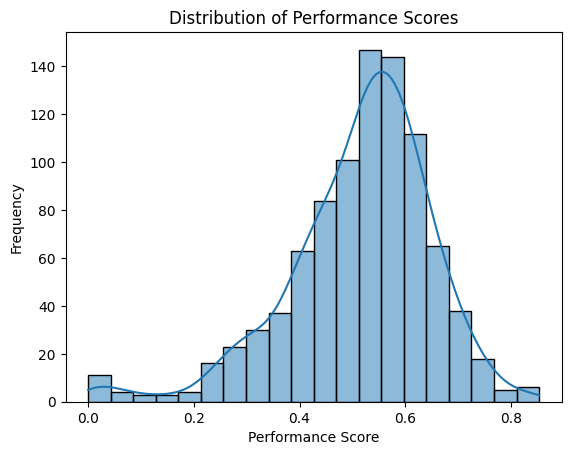

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(performance_df['performance_score'], bins=20, kde=True)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.show()

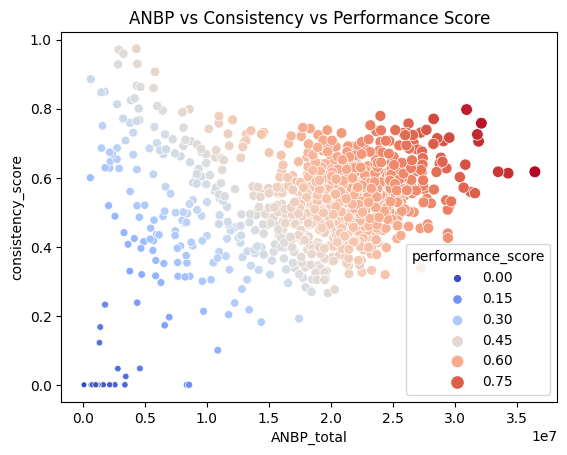

In [16]:
sns.scatterplot(data=performance_df, x='ANBP_total', y='consistency_score', size='performance_score', hue='performance_score', palette='coolwarm')
plt.title('ANBP vs Consistency vs Performance Score')
plt.show()

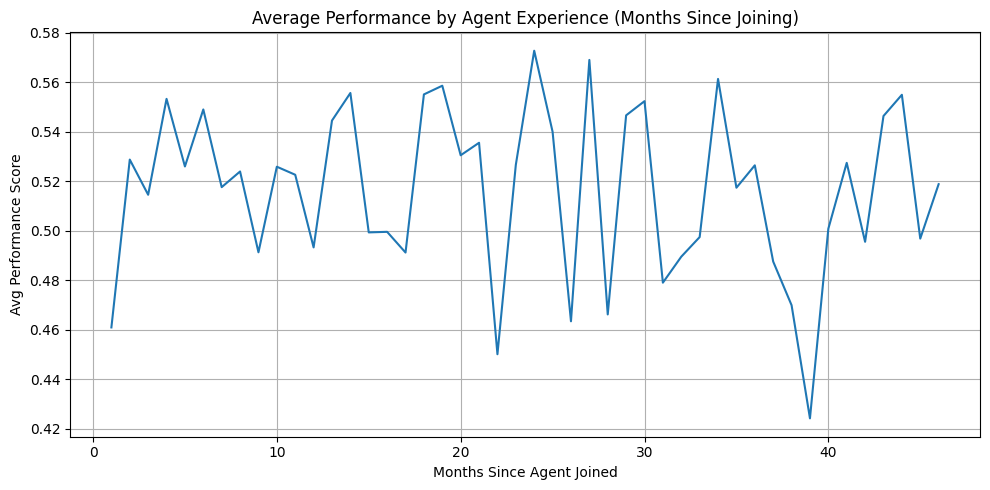

In [17]:
performance_df['agent_join_month'] = pd.to_datetime(df['agent_join_month'], format='%m/%d/%Y')
performance_df['year_month'] = pd.to_datetime(df['year_month'], format='%m/%d/%Y')

performance_df['months_since_join'] = ((performance_df['year_month'].dt.year - performance_df['agent_join_month'].dt.year) * 12 + 
                           (performance_df['year_month'].dt.month - performance_df['agent_join_month'].dt.month))

performance_by_experience = performance_df.groupby('months_since_join')['performance_score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=performance_by_experience, x='months_since_join', y='performance_score')
plt.title('Average Performance by Agent Experience (Months Since Joining)')
plt.xlabel('Months Since Agent Joined')
plt.ylabel('Avg Performance Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Categorize Agent Performance

In [18]:
performance_df

,agent_code,ANBP_total,policy_mean,policy_std,consistency_score,performance_score,agent_join_month,year_month,months_since_join
0,003c1999,27562219,22.619048,9.795286,0.566945,0.686281,2021-02-01,2023-01-01,23
1,00d5bda3,18982208,19.952381,13.063216,0.345280,0.453591,2022-04-01,2023-01-01,9
2,012a3553,21477773,18.523810,10.533846,0.431335,0.530140,2020-05-01,2023-01-01,32
3,012f0e15,18339446,19.476190,9.877343,0.492850,0.503630,2019-07-01,2023-01-01,42
4,0177ed5f,21444727,21.047619,7.255868,0.655264,0.621622,2020-09-01,2023-01-01,28
...,...,...,...,...,...,...,...,...,...
909,ff8edcc9,24823097,21.428571,10.057691,0.530641,0.626158,2021-12-01,2023-02-01,14
910,ff955d18,3465210,13.333333,13.012814,0.024039,0.065499,2022-02-01,2023-02-01,12
911,ffca3177,26541963,21.095238,7.374990,0.650396,0.703739,2022-06-01,2023-02-01,8
912,ffe6c9e9,17084083,19.380952,9.124013,0.529228,0.497863,2022-03-01,2023-02-01,11


In [19]:
performance_df = performance_df.drop(['agent_join_month', 'year_month'], axis=1)

In [20]:
performance_df

,agent_code,ANBP_total,policy_mean,policy_std,consistency_score,performance_score,months_since_join
0,003c1999,27562219,22.619048,9.795286,0.566945,0.686281,23
1,00d5bda3,18982208,19.952381,13.063216,0.345280,0.453591,9
2,012a3553,21477773,18.523810,10.533846,0.431335,0.530140,32
3,012f0e15,18339446,19.476190,9.877343,0.492850,0.503630,42
4,0177ed5f,21444727,21.047619,7.255868,0.655264,0.621622,28
...,...,...,...,...,...,...,...
909,ff8edcc9,24823097,21.428571,10.057691,0.530641,0.626158,14
910,ff955d18,3465210,13.333333,13.012814,0.024039,0.065499,12
911,ffca3177,26541963,21.095238,7.374990,0.650396,0.703739,8
912,ffe6c9e9,17084083,19.380952,9.124013,0.529228,0.497863,11


In [21]:
performance_df.describe()

,ANBP_total,policy_mean,policy_std,consistency_score,performance_score,months_since_join
count,9.140000e+02,914.000000,905.000000,914.000000,914.000000,914.000000
mean,1.818110e+07,20.334984,9.269892,0.526339,0.514779,24.007659
std,6.913578e+06,2.634427,1.930040,0.143541,0.136186,13.388334
min,9.490000e+04,10.000000,0.577350,0.000000,0.000000,1.000000
25%,1.498422e+07,18.857143,8.324090,0.450381,0.444406,12.000000
50%,1.974208e+07,20.333333,9.442558,0.531620,0.534077,24.000000
75%,2.273847e+07,21.857143,10.542657,0.616788,0.603554,36.000000
max,3.645252e+07,31.000000,16.350331,0.973317,0.853549,46.000000


In [22]:
mean_score = performance_df['performance_score'].mean()
std_score = performance_df['performance_score'].std()

def categorize_performance(score):
    if score >= mean_score + 0.5 * std_score:
        return 'High'
    elif score <= mean_score - 0.5 * std_score:
        return 'Low'
    else:
        return 'Medium'

In [23]:
performance_df['performance_category'] = performance_df['performance_score'].apply(categorize_performance)

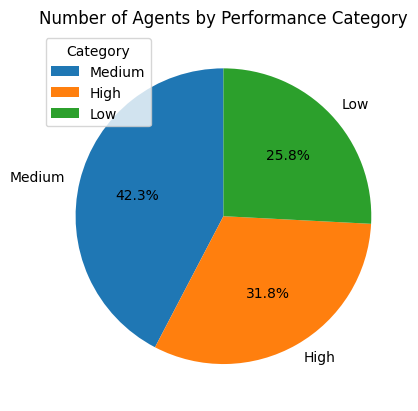

In [24]:
import matplotlib.pyplot as plt

performance_df['performance_category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',      
    startangle=90,       
    legend=True             
)
plt.title("Number of Agents by Performance Category")
plt.ylabel("")  
plt.legend(title='Category', loc='best') 
plt.show()


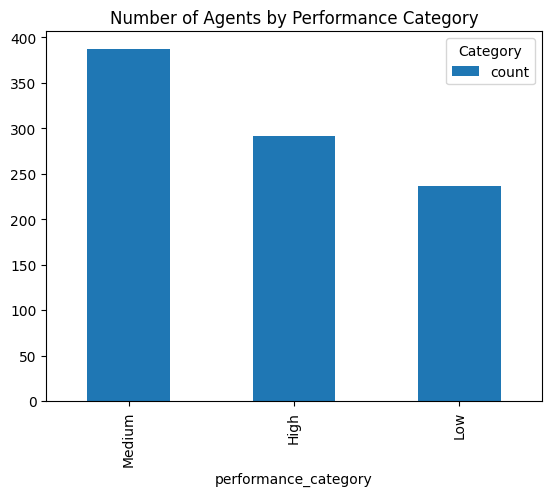

In [25]:
import matplotlib.pyplot as plt

performance_df['performance_category'].value_counts().plot(
    kind='bar',
    legend=True           
)
plt.title("Number of Agents by Performance Category")
plt.ylabel("")  
plt.legend(title='Category', loc='best')  
plt.show()